In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
train_path = 'C:/Users/User/Desktop/Fruit_Classification/Dataset/train'
test_path = 'C:/Users/User/Desktop/Fruit_Classification/Dataset/test'

Dataset from : https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection

### Train

In [3]:
train_img = []
train_lab = []

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        train_lab.append(filename.split('_')[0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(200,200))
        train_img.append(img)


In [4]:
train_img[0].shape

(200, 200, 3)

In [5]:
for ele in range(len(train_img)):
    train_img[ele] = train_img[ele] / 255.
train_img[0].shape

(200, 200, 3)

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

train_lab = np.array(train_lab)

label_encoder = LabelEncoder()
Ytrain = label_encoder.fit_transform(train_lab)

In [7]:
Xtrain = np.array(train_img)

In [8]:
Xtrain.shape

(240, 200, 200, 3)

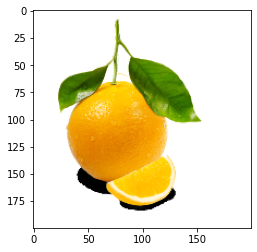

In [9]:
plt.imshow(Xtrain[np.random.randint(0,240)])

In [10]:
del(train_lab)
del(train_img)

In [11]:
# https://dwbi1.wordpress.com/2021/07/04/what-is-convolutional-neural-network-cnn/
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'],optimizer='sgd')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0

In [13]:
history = model.fit(Xtrain, Ytrain, epochs=200)

Epoch 1/200
8/8 [==============================] - 6s 206ms/step - loss: 1.3360 - acc: 0.3125
Epoch 2/200
8/8 [==============================] - 1s 76ms/step - loss: 1.3136 - acc: 0.3000
Epoch 3/200
8/8 [==============================] - 1s 76ms/step - loss: 1.3031 - acc: 0.3083
Epoch 4/200
8/8 [==============================] - 1s 76ms/step - loss: 1.2936 - acc: 0.3792
Epoch 5/200
8/8 [==============================] - 1s 76ms/step - loss: 1.2731 - acc: 0.3875
Epoch 6/200
8/8 [==============================] - 1s 76ms/step - loss: 1.2344 - acc: 0.4875
Epoch 7/200
8/8 [==============================] - 1s 76ms/step - loss: 1.2986 - acc: 0.4375
Epoch 8/200
8/8 [==============================] - 1s 75ms/step - loss: 1.1926 - acc: 0.5167
Epoch 9/200
8/8 [==============================] - 1s 74ms/step - loss: 1.1701 - acc: 0.4708
Epoch 10/200
8/8 [==============================] - 1s 74ms/step - loss: 1.1003 - acc: 0.5708
Epoch 11/200
8/8 [==============================] - 1s 74ms/step - l

Text(0.5, 1.0, 'acc')

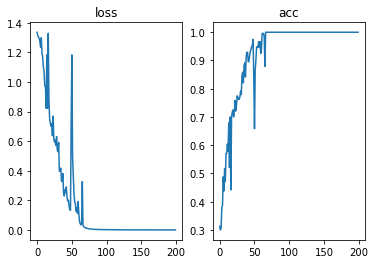

In [14]:

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.title('acc')

### Test

In [15]:
test_img = []
test_lab = []

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        test_lab.append(filename.split('_')[0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(200,200))
        test_img.append(img)

In [16]:
for ele in range(len(test_img)):
    test_img[ele] = test_img[ele] / 255.
test_img[0].shape

(200, 200, 3)

In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

test_lab = np.array(test_lab)

label_encoder = LabelEncoder()
Ytest = label_encoder.fit_transform(test_lab)

In [18]:
Xtest = np.array(test_img)

In [19]:
ypred = model.predict(Xtest)
print("Score:",np.sum(ypred.argmax(axis=1) == Ytest)/len(ypred))

Score: 0.9


In [20]:
oneHotKey = { 0:'apple',1:'banana',2:'mixed',3:'orange'}
ypred_map = []
for i in range(len(Xtest)):
    ypred_map.append(oneHotKey[np.argmax(ypred[i])])

Actual: banana
Predict: banana


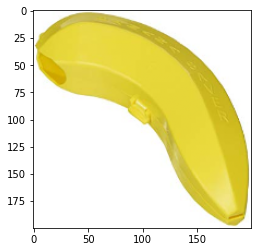

In [21]:
rand_index = np.random.randint(0,len(ypred_map))
print("Actual:",ypred_map[rand_index])
print("Predict:",oneHotKey[Ytest[rand_index]])
plt.imshow(Xtest[rand_index])